# **STATEMENT OF PURPOSE**

Through this project we aim to clean, sort, analyze and derive insights from a dataset about the movie industry. We will be focusing on identifying key driving factors for the movie business and highlight patterns we recognize along the way. The goal is identify factors that influence the success or failure of a movie and assess the dataset as a whole to help gain a better understanding of the industry. 

# **SUMMARY OF INSIGHTS**

**1.Family films deliver strong, efficient returns**

Even with comparatively modest budgets, family movies cluster high on the gross-revenue axis and show low dispersion, indicating a consistently attractive return on investment (ROI).

**2.Action and Animation command the biggest budgets**
These genres sit at the top of the budget scale and also contain several extreme high-gross outliers, reflecting the “blockbuster” model—large spend, large potential payoff, but greater financial risk.

**3.High-gross outliers underline hit-driven economics**
Both Action and Animated categories feature long “whiskers” and individual points far above the upper quartile, illustrating that a handful of runaway hits skew average grosses upward.

**4.Westerns, Thrillers, and Horror operate on lean budgets—and earn lean grosses**
Their boxes are compressed near the bottom for both budget and gross, showing limited financial upside but lower capital exposure; these genres often rely on niche audiences or cost-effective production.

**5.Family genre offers the most stable ROI profile**
The tight inter-quartile range (IQR) for family films on both budget and gross suggests predictable performance—fewer flops and fewer runaway losses—making them attractive from a risk-adjusted perspective.

## **CONTENTS**

1. HANDLING MISSING DATA
2. MANAGING DATA CONSISTENCY
3. SCATTER PLOT USING MATPLOTLIB
4. REGRESSION PLOT USING SEABORN
5. CORRELATION MATRIX
6. BOX PLOTS


In [1]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read in the data
df = pd.read_csv('/Users/akulahluwalia/Downloads/movies.csv')

In [2]:
#Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Evaluating for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#Dropping missing values

df.dropna(inplace=True)

In [5]:
#Examining data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Changing Data Types

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [7]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [150]:
#Creating Correct Year Column

df['year_correct']=df['released'].astype('str').str[8:13]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [155]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,11
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,83
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,12
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,11
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,83


In [8]:
df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [9]:
#Observations
# Budget and Gross revenue could have high correlation
#Company and Gross revenue coulad also have high correlation


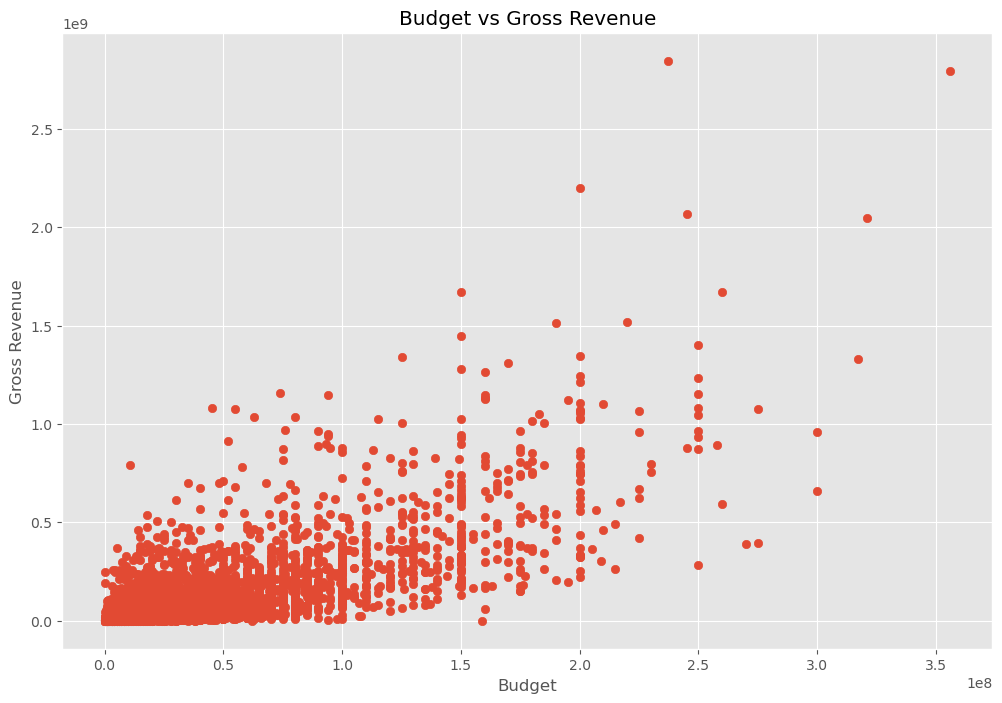

In [89]:
#Scatter plot for Budget vs Gross Revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

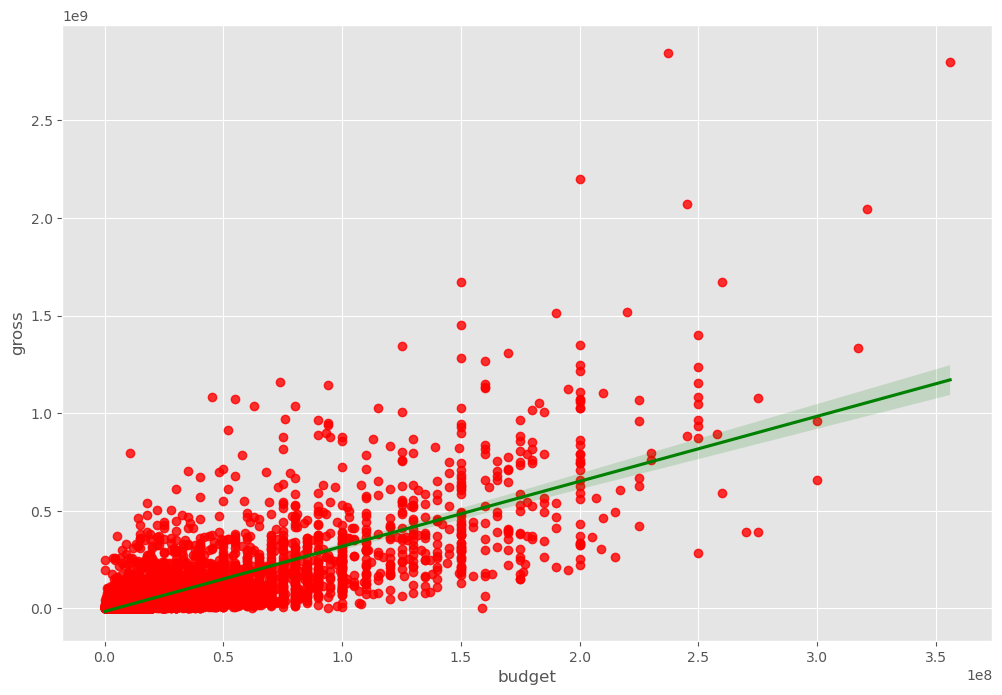

In [10]:
#Regression plot using Seaborn for Budget vs Gross Revenue

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'green'})

In [11]:
#Pearson Correlation(Numeric Variables only)

numeric_df = df.select_dtypes(include = 'number')
correlation_matrix = numeric_df.corr(method= 'pearson')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000


In [107]:
#Note:
#High Correlation between Budget and Gross

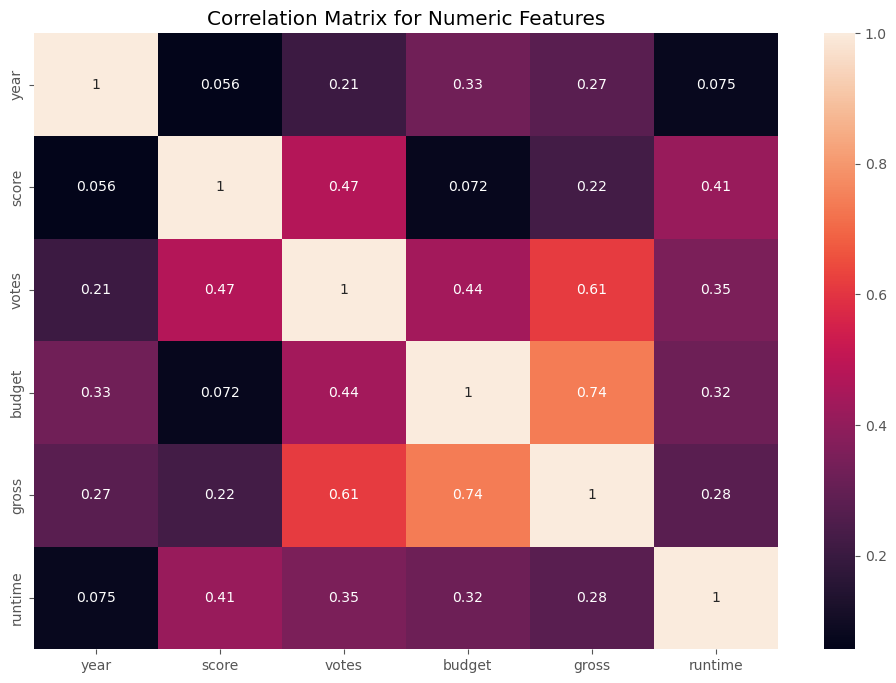

In [122]:
correlation_matrix = numeric_df.corr(method= 'pearson')

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [153]:
#Converting variables to numeric outputs

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,11
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,83
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,12
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,11
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,83


In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


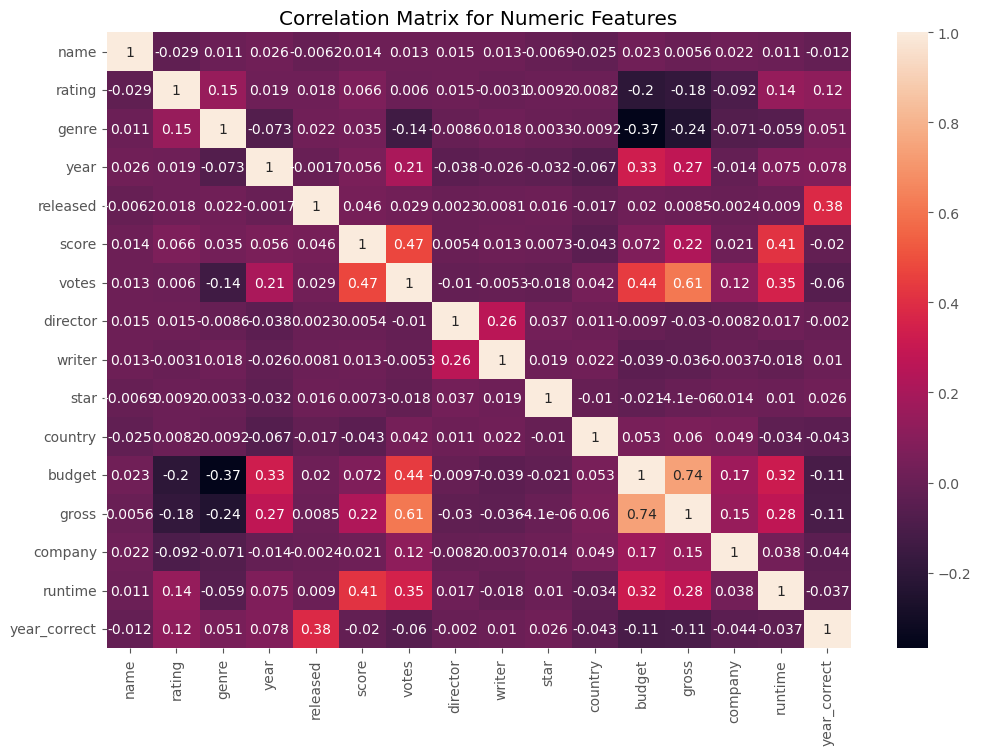

In [158]:
correlation_matrix = df_numerized.corr(method= 'pearson')

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [159]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.012024
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.120958
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.051315
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.077609
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.380835
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,-0.020251
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,-0.060276
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.002020
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.010132
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.025947


In [162]:
#Correlation matrix unstacked

corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              year_correct   -0.012024
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [165]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.368523
genre         budget         -0.368523
              gross          -0.244101
gross         genre          -0.244101
budget        rating         -0.203946
rating        budget         -0.203946
gross         rating         -0.181906
rating        gross          -0.181906
votes         genre          -0.135990
genre         votes          -0.135990
budget        year_correct   -0.110161
year_correct  budget         -0.110161
gross         year_correct   -0.106301
year_correct  gross          -0.106301
rating        company        -0.092357
company       rating         -0.092357
genre         year           -0.073167
year          genre          -0.073167
company       genre          -0.071334
genre         company        -0.071334
year          country        -0.066748
country       year           -0.066748
year_correct  votes          -0.060276
votes         year_correct   -0.060276
runtime       genre          -0.059237
genre         runtime    

In [173]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]

high_corr

gross   votes     0.614751
votes   gross     0.614751
gross   budget    0.740247
budget  gross     0.740247
dtype: float64

In [ ]:
#Insights
# The highest grossing movies seem to have a higher number of positive votes
# Movies that have a higher budget tend to generate a higher gross
# There is a weak correlation/relationship between the budget and votes for a movie
# There is a negative correlation between the genre of a movie and its budget and gross,
# Since "genre" is a categorical variable, it needs to be analyzed further with box plot or grouped analysis.

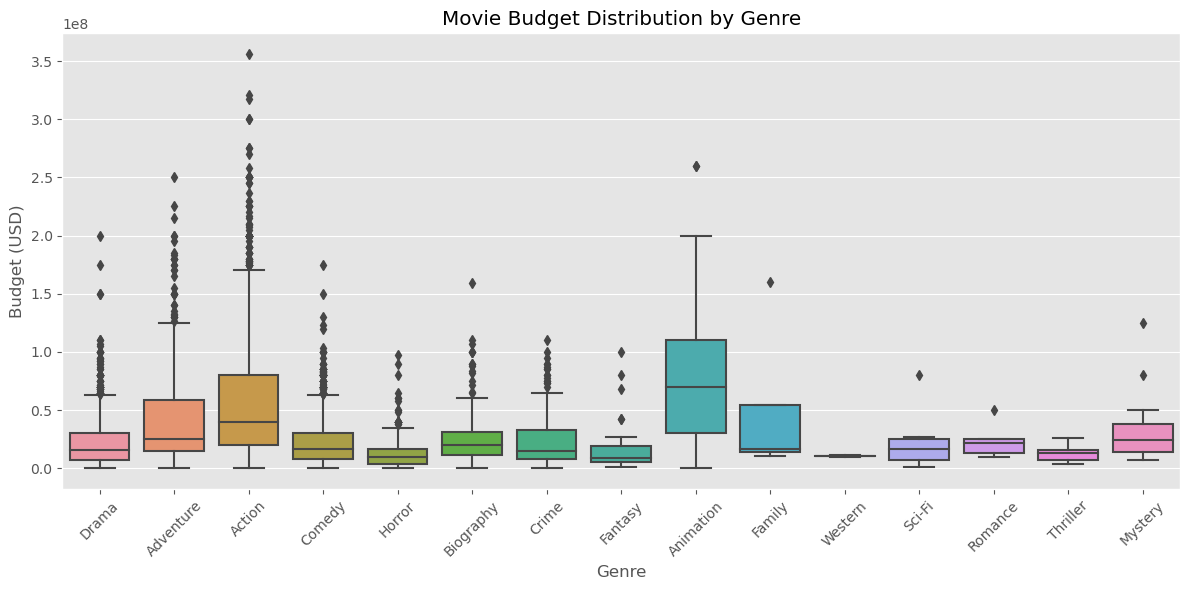

In [13]:
# Boxplot: Budget by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='budget', data=df)
plt.xticks(rotation=45)
plt.title('Movie Budget Distribution by Genre')
plt.ylabel('Budget (USD)')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

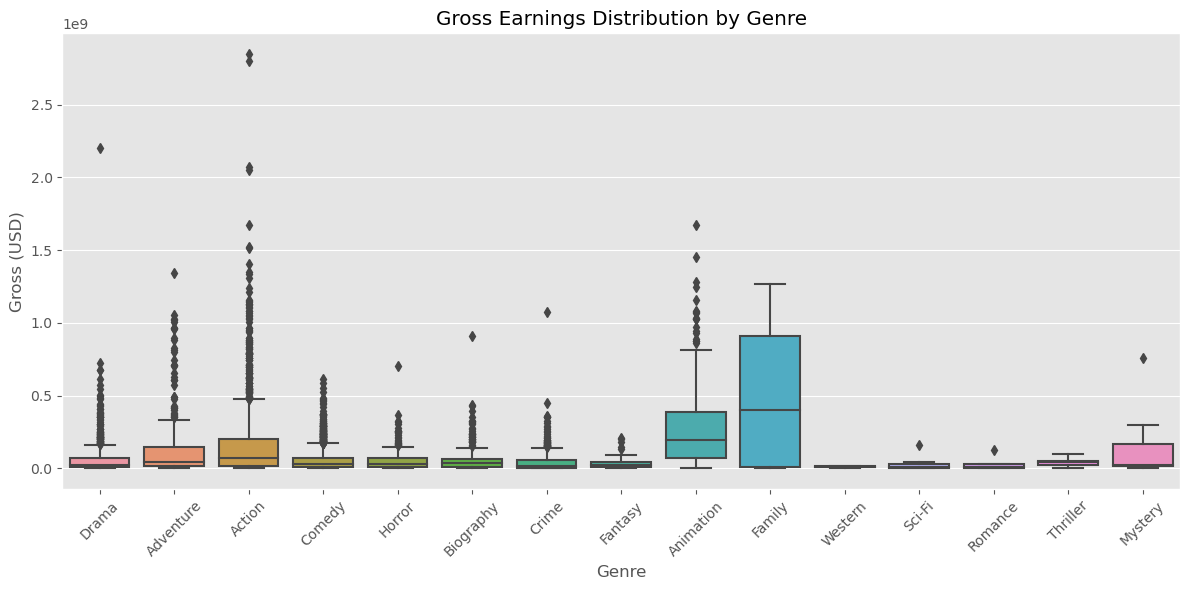

In [15]:
# Boxplot: Gross by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='gross', data=df)
plt.xticks(rotation=45)
plt.title('Gross Earnings Distribution by Genre')
plt.ylabel('Gross (USD)')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

In [ ]:
#Insights from Box plots
# Family movies have a higher gross even with a lower budget
# Action movies and Animated movies are the ones with the highest budgets
# Both of these genres have high grossing outliers.
# Westerns, Thrillers and Horror seem to have the lowest budget and gross earnings.
# Family movies seem to offer the best and most stable ROI.